# 원, 삼각형, 사각형 구분하기


In [ ]:
from google.colab import files
up = files.upload()

Saving handwriting_shape.zip to handwriting_shape.zip


In [ ]:
!unzip handwriting_shape.zip -d handwriting_shape > /dev/null

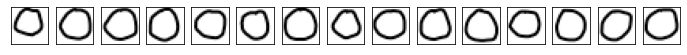

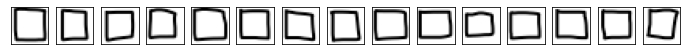

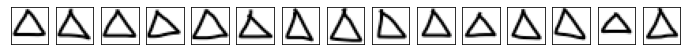

In [ ]:
from PIL import Image
import glob
import matplotlib.pyplot as plt

# Train 이미지 확인
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'handwriting_shape/train/{shape}'
    plt.figure(figsize = (12, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

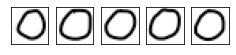

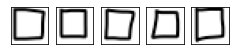

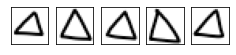

In [ ]:
for shape in shapes:
    dir_name = f'handwriting_shape/test/{shape}'
    plt.figure(figsize = (12, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
import cv2
cv2.imread(fname).shape

(24, 24, 3)

* 데이터셋 생성하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255)
train_data_generator = train_datagen.flow_from_directory(
    'handwriting_shape/train',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_data_generator = test_datagen.flow_from_directory(
    'handwriting_shape/test',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 15 images belonging to 3 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
train_data_generator.filenames[0]

'circle/circle001.png'

* 모델 정의/설정

In [ ]:
import numpy as np
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (24, 24, 3), activation = 'relu'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 6400)              0         
                                                                 
 dense (Dense)               (None, 128)               819328    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [ ]:
model.compile(
    optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy']
)

* 모델 학습

In [ ]:
model.fit(
    train_data_generator,
    validation_data = test_data_generator,
    steps_per_epoch = 15,
    validation_steps = 5,
    epochs = 50
)

Epoch 1/50
15/15 [==============================] - 1s 40ms/step - loss: 1.0912 - accuracy: 0.5333 - val_loss: 0.5774 - val_accuracy: 0.9333
Epoch 2/50
15/15 [==============================] - 0s 26ms/step - loss: 0.3352 - accuracy: 0.8667 - val_loss: 0.1275 - val_accuracy: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 23ms/step - loss: 0.0567 - accuracy: 1.0000 - val_loss: 0.0395 - val_accuracy: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.0173 - val_accuracy: 1.0000
Epoch 5/50
15/15 [==============================] - 0s 23ms/step - loss: 8.7929e-04 - accuracy: 1.0000 - val_loss: 0.0148 - val_accuracy: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 23ms/step - loss: 5.6903e-04 - accuracy: 1.0000 - val_loss: 0.0150 - val_accuracy: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 23ms/step - loss: 4.1709e-04 - accuracy: 1.0000 - val_loss: 0.0180 - val_accuracy: 1.0000
E

In [ ]:
model.evaluate(test_data_generator, steps=5)    # batch size가 3, 총 데이터 갯수는 15개

# 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 기존 CNN 모델로 푸는 경우

In [ ]:
up = files.upload()

Saving hard_handwriting_shape.zip to hard_handwriting_shape.zip


In [ ]:
!unzip hard_handwriting_shape.zip -d hard_handwriting_shape > /dev/null

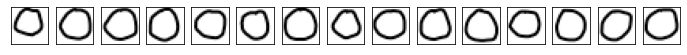

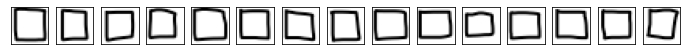

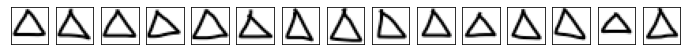

In [ ]:
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/train/{shape}'
    plt.figure(figsize = (12, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()

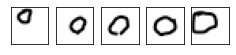

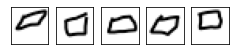

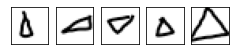

In [ ]:
for shape in shapes:
    dir_name = f'hard_handwriting_shape/test/{shape}'
    plt.figure(figsize = (12, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):
        img = Image.open(fname)
        plt.subplot(1, 15, i+1)
        plt.imshow(img)
        plt.xticks([])
        plt.yticks([])
    plt.show()

* 데이터셋 생성하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting_shape/train',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 45 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1/255)
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 15 images belonging to 3 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
train_data_generator.filenames[0]

'circle/circle001.png'

* 모델 정의/설정

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (24, 24, 3), activation='relu'),
                    Conv2D(64, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 6400)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               819328    
                                                                 
 dense_3 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(
    train_data_generator,
    validation_data = test_data_generator,
    steps_per_epoch = 15,
    validation_steps = 5,
    epochs = 50
)

Epoch 1/50
15/15 [==============================] - 1s 38ms/step - loss: 0.7682 - accuracy: 0.7556 - val_loss: 2.1715 - val_accuracy: 0.3333
Epoch 2/50
15/15 [==============================] - 0s 26ms/step - loss: 0.1690 - accuracy: 0.9778 - val_loss: 3.1656 - val_accuracy: 0.3333
Epoch 3/50
15/15 [==============================] - 0s 24ms/step - loss: 0.0080 - accuracy: 1.0000 - val_loss: 4.2320 - val_accuracy: 0.3333
Epoch 4/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 4.6218 - val_accuracy: 0.3333
Epoch 5/50
15/15 [==============================] - 0s 24ms/step - loss: 5.7815e-04 - accuracy: 1.0000 - val_loss: 4.7901 - val_accuracy: 0.3333
Epoch 6/50
15/15 [==============================] - 0s 26ms/step - loss: 3.4763e-04 - accuracy: 1.0000 - val_loss: 4.9181 - val_accuracy: 0.3333
Epoch 7/50
15/15 [==============================] - 0s 26ms/step - loss: 2.7320e-04 - accuracy: 1.0000 - val_loss: 5.0222 - val_accuracy: 0.3333
E

In [ ]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 7ms/step - loss: 6.0963 - accuracy: 0.3333


[6.096307277679443, 0.3333333432674408]

# 원, 삼각형, 사각형 구분하기
- 어려운 테스트 문제를 데이터 부풀리기를 이용하여 데이터를 많이 생성
- 기존 CNN 모델 사용

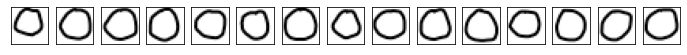

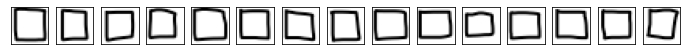

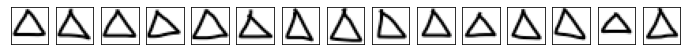

In [ ]:
shapes = ['circle', 'rectangle', 'triangle']
for shape in shapes:
    dir_name = f'hard_handwriting_shape/train/{shape}'     # hard_handwriting_shape 폴더 밑에 shape이라는 의미
    plt.figure(figsize = (12, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):    
        img = Image.open(fname)
        plt.subplot(1, 15, i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

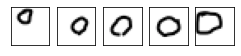

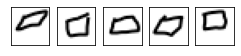

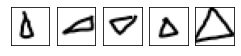

In [ ]:
for shape in shapes:
    dir_name = f'hard_handwriting_shape/test/{shape}'     # hard_handwriting_shape 폴더 밑에 shape이라는 의미
    plt.figure(figsize = (4, 1))
    for i, fname in enumerate(glob.glob(f'{dir_name}/*.png')):    
        img = Image.open(fname)
        plt.subplot(1, 5, i+1), plt.imshow(img), plt.xticks([]), plt.yticks([])
    plt.show()

In [ ]:
cv2.imread(fname).shape

(24, 24, 3)

* 데이터셋 생성하기

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 15,
    width_shift_range = 0.1,
    height_shift_range = 0.1,
    shear_range = 0.5,
    zoom_range = [0.8, 2.0],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = 'nearest'
)

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)

In [ ]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img('hard_handwriting_shape/train/triangle/triangle001.png')
x = img_to_array(img)
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

* 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지 확인

In [ ]:
import os
if not os.path.exists('preview'):
    os.mkdir('preview')

In [ ]:
# flow : array로부터 데이터를 가져오겠다는 의미라고 하심

count = 0
for _ in train_datagen.flow(x, batch_size = 1, save_to_dir='preview', save_prefix = 'tri'):
    count += 1
    if count >= 30:
        break

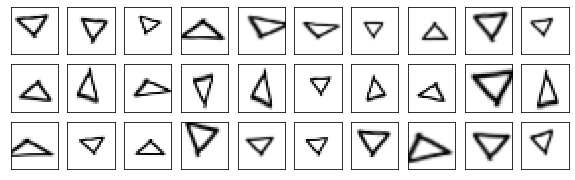

In [ ]:
plt.figure(figsize = (10, 3))
for i, fname in enumerate(glob.glob('preview/*.png')):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img)
    plt.xticks([])
    plt.yticks([])  
plt.show()

In [ ]:
train_data_generator = train_datagen.flow_from_directory(
    'hard_handwriting_shape/train',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

# 45개가 들어가지만 각 epoch당 다른 변형 이미지가 들어가는 구조라고 하심

Found 45 images belonging to 3 classes.


In [ ]:
test_data_generator = test_datagen.flow_from_directory(
    'hard_handwriting_shape/test',
    target_size = (24, 24),
    batch_size = 3,
    class_mode = 'categorical'
)

Found 15 images belonging to 3 classes.


In [ ]:
train_data_generator.labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2], dtype=int32)

In [ ]:
train_data_generator.filenames[0]

'circle/circle001.png'

* 모델 정의/설정

In [ ]:
import numpy as np
import tensorflow as tf

seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential([
                    Conv2D(32, (3, 3), input_shape = (24, 24, 3), activation = 'relu'),
                    Conv2D(32, (3, 3), activation = 'relu'),
                    MaxPooling2D(),
                    Flatten(),
                    Dense(128, activation = 'relu'),
                    Dense(3, activation = 'softmax')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 22, 22, 32)        896       
                                                                 
 conv2d_5 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 128)               409728    
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                      

In [ ]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

* 모델 학습

In [ ]:
hist = model.fit(
    train_data_generator,
    validation_data = test_data_generator,
    steps_per_epoch = 15,
    validation_steps = 5,
    epochs = 300
)

Epoch 1/300
15/15 [==============================] - 1s 32ms/step - loss: 1.2752 - accuracy: 0.2889 - val_loss: 1.0962 - val_accuracy: 0.3333
Epoch 2/300
15/15 [==============================] - 0s 18ms/step - loss: 1.0591 - accuracy: 0.4000 - val_loss: 1.0816 - val_accuracy: 0.4667
Epoch 3/300
15/15 [==============================] - 0s 17ms/step - loss: 0.9927 - accuracy: 0.4667 - val_loss: 1.1081 - val_accuracy: 0.3333
Epoch 4/300
15/15 [==============================] - 0s 19ms/step - loss: 0.8556 - accuracy: 0.6000 - val_loss: 1.1530 - val_accuracy: 0.4000
Epoch 5/300
15/15 [==============================] - 0s 18ms/step - loss: 0.7567 - accuracy: 0.7111 - val_loss: 1.1496 - val_accuracy: 0.4667
Epoch 6/300
15/15 [==============================] - 0s 22ms/step - loss: 0.6486 - accuracy: 0.6667 - val_loss: 1.6438 - val_accuracy: 0.4000
Epoch 7/300
15/15 [==============================] - 0s 21ms/step - loss: 0.6968 - accuracy: 0.6889 - val_loss: 1.1841 - val_accuracy: 0.6000
Epoch 

In [ ]:
model.evaluate(test_data_generator)

5/5 [==============================] - 0s 5ms/step - loss: 2.1230 - accuracy: 0.8000


[2.122997522354126, 0.800000011920929]

* 학습과정 시각화

In [ ]:
y_acc = hist.history['accuracy']
y_loss = hist.history['loss']
y_vacc = hist.history['val_accuracy']
y_vloss = hist.history['val_loss']
xs = np.arange(1, len(y_acc) + 1)

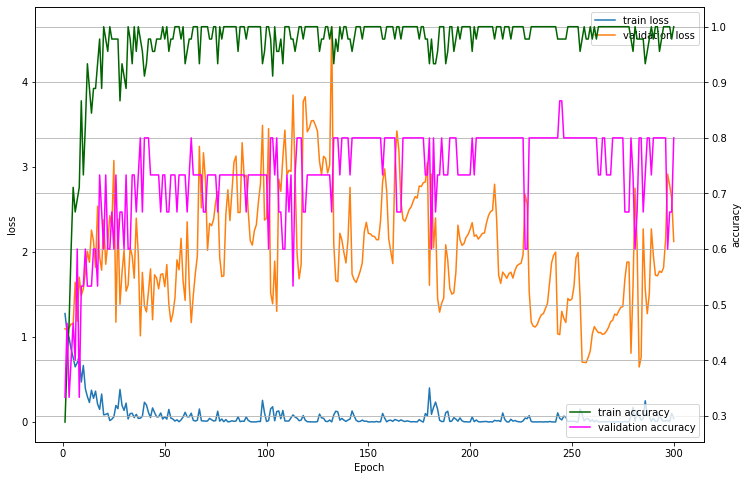

In [ ]:
_, ax0 = plt.subplots(figsize = (12, 8))
ax1 = ax0.twinx()
ax0.plot(xs, y_loss, label='train loss')
ax0.plot(xs, y_vloss, label='validation loss')
ax0.set_ylabel('loss')
ax1.plot(xs, y_acc, c = 'darkgreen', label='train accuracy')
ax1.plot(xs, y_vacc, c = 'magenta', label='validation accuracy')
ax1.set_ylabel('accuracy')
ax0.set_xlabel('Epoch')
ax0.legend(), ax1.legend()
plt.grid()
plt.show()